In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_table('layoff_data.txt')

In [3]:
dates = pd.read_table('layoff_dates.txt')

/Users/Logan/anaconda/envs/dev/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
reasons = pd.read_table('layoff_reasons.txt').reset_index()

In [5]:
automation_reasons = list(reasons[reasons.irc_code.apply(lambda x: 'automation' in x.lower())]['index'])

In [26]:
dates['value'] = dates['value'].replace('           -', np.nan).astype(float)

In [46]:
codes = reasons[['index', 'irc_code']]
codes.columns = 'irc_code reason'.split()

In [47]:
new_data = data[['series_id', 'srd_code', 'irc_code']]

In [57]:
events = new_data.merge(codes, on = 'irc_code', how = 'inner')

In [67]:
event_reasons_total = events[events.irc_code.apply(lambda x: str(x)[0] == 'R')]


In [77]:
# filter reasons
event_reasons = event_reasons[event_reasons.reason.apply(lambda x: "total" not in x.lower() and 'not provided' not in x.lower())]
event_reasons = event_reasons[event_reasons.irc_code.apply(lambda x: str(x)[-1] != '0')]
good_reasons = event_reasons.groupby('irc_code')[['irc_code', 'reason']].head(1)

In [78]:
good_reasons

,irc_code,reason
56699,R0111,Contract cancellation
56858,R0112,Contract completion
57017,R0113,Domestic competition
57176,R0114,Excess inventory/saturated market
57335,R0115,Import competition
57494,R0116,Slack work/insufficient demand/non-seasonal bu...
57812,R0121,Hazardous work environment
57971,R0122,Natural disaster (not weather related)
58130,R0123,Non-natural disaster
58289,R0124,Extreme weather-related event


In [115]:
automated = event_reasons[event_reasons.irc_code == 'R0151']
total_layoffs = event_reasons[event_reasons.irc_code.isin(good_reasons.irc_code)]
pct_automated = automated.shape[0] / float(total_layoffs.shape[0])

In [116]:
automated_away = automated.merge(dates, on = 'series_id', how = 'inner')
total_automated = automated_away.value.sum()

In [119]:
non_automated_away = total_layoffs[total_layoffs.irc_code != 'R0151']
non_automated_away = non_automated_away.merge(dates, on = 'series_id', how = 'inner')

In [123]:
non_automated_away.value.sum()

136840511.0

In [132]:
non_automated_away[['irc_code', 'reason']].drop_duplicates()

,irc_code,reason
0,R0111,Contract cancellation
14151,R0112,Contract completion
28302,R0113,Domestic competition
42453,R0114,Excess inventory/saturated market
56604,R0115,Import competition
70755,R0116,Slack work/insufficient demand/non-seasonal bu...
84906,R0121,Hazardous work environment
99057,R0122,Natural disaster (not weather related)
113208,R0123,Non-natural disaster
122430,R0124,Extreme weather-related event


In [124]:
yby_layoffs = ["1,320,844",
"1,381,669",
"1,583,817",
"1,382,359",
"1,645,532",
"2,346,584",
"2,069,713",
"1,721,985",
"1,464,164",
"1,640,878",
"1,371,995",
"1,485,973",
"1,995,027"]

In [148]:
y98t8 = map(lambda x: int(x.replace(',','')), yby_layoffs)

In [143]:
y9t12 = np.sum(map(lambda x: map(lambda y: int(y.replace(',', '')) , x), lol), axis = 1)

In [150]:
y98t8 += list(y9t12)

In [152]:
year_data = y98t8

In [156]:
indices = []
for i, v in enumerate(year_data):
    index = 2012 - len(year_data) + i + 1
    indices.append(index)

In [158]:
points = np.array(zip(indices, year_data))

In [160]:
x, y = points[:,0], points[:,1]

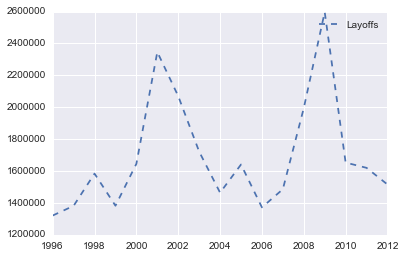

In [164]:
sns.plt.plot(x,y, label = 'Layoffs', linestyle = '--')
sns.plt.legend()